In [2]:
!pip install tweepy 
!pip install textblob 
%pip install wordcloud
pip install pipreqs 

SyntaxError: invalid syntax (Temp/ipykernel_21776/1306558499.py, line 4)

In [3]:

import tweepy # to gather tweeter data
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
#from wordcloud import WordCloud
#plt.style.use('fivethirtyeight')

In [4]:
# Twitter Api  Credentials
APIkey= "6HQiJpYgkFvDzeuYyEzaRalkE"
APISecreatKey= "hKzYEPinXpT6nqX1fQP9HYE0ir3SYRaHUnZFhJBJxrK9WaE1lx"
accessToken= "1496790128223830022-JCM8k0yu05463B5FSpBgl4jabxANyz"
accessTokenSecreat= "ypjJjMkBiJqstTVn2CZhIzwFZeadHfrmILpCmvxMOpBfr"

In [5]:
# create the authentication object
authenticate = tweepy.OAuthHandler(APIkey,APISecreatKey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api= tweepy.API(authenticate)

In [6]:
posts= api.user_timeline(screen_name='OverBorderGames',count=100,tweet_mode='extended') 


In [7]:
i=1
for tweet in posts[:10]:  # just want to see the top 10 from 100
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) @Shinzaemon_13 PlayStation 5 &amp; Xbox Series X|S too!

2) Let's take a look at another combat mechanic: Feathers.

👇 https://t.co/bGOpVyrEN3

3) @jothric Afraid not, current gen only atm!

4) @MasterNinjaRyu1 @Team17 Blimey! Great work :)

5) @Kratos_playz Physicals are coming! :)

6) Thymesia's demo closes today! Thank you for playing. 

The demo is a modified version of the tutorial. Its purpose is to practice the basic combat system — the mechanics can be iteratively improved and become more advanced, very quickly!

Full post 👇

https://t.co/3GnizUeBOE

7) Thank you for your support, @yosp 🙏

We hope you're prepared for this plague-ridden challenge into the depths of darkness. https://t.co/QqNqRQIAQW

8) RT @yosp: August 9 on PS5!

Thymesia | Release Date Announcement Trailer https://t.co/vzGgmLBZcK @YouTube

9) Watch some exclusive Thymesia gameplay on Twitch!

@Team17 will be live today, showcasing some gruelling combat and answering questions!

⌛ 4pm BST | 11am EST

👉 https:

In [8]:
# Create a dataframe with a column called tweets
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df


,Tweets
0,@Shinzaemon_13 PlayStation 5 &amp; Xbox Series...
1,Let's take a look at another combat mechanic: ...
2,"@jothric Afraid not, current gen only atm!"
3,@MasterNinjaRyu1 @Team17 Blimey! Great work :)
4,@Kratos_playz Physicals are coming! :)
...,...
95,Not bad!\n\nMy turn... https://t.co/rSTwfEqxrn
96,"@GODOFWAR661 No difficulty at present, we will..."
97,@Shadowz6677 We won't release the game until i...
98,@Shadowz6677 In good time.


In [9]:
# make a function to clean tweets
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [10]:
df['Tweets']= df['Tweets'].apply(cleanTxt)

In [11]:
df

,Tweets
0,_13 PlayStation 5 &amp; Xbox Series X|S too!
1,Let's take a look at another combat mechanic: ...
2,"Afraid not, current gen only atm!"
3,Blimey! Great work :)
4,_playz Physicals are coming! :)
...,...
95,Not bad!\n\nMy turn...
96,"No difficulty at present, we will share neare..."
97,We won't release the game until it's ready. F...
98,In good time.


In [12]:
analysis=TextBlob("Tehreem is good ")

In [13]:
analysis.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [881]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [882]:
df

,Tweets,Subjectivity,Polarity
0,Blimey! Great work :),0.87500,0.6500
1,_playz Physicals are coming! :),1.00000,0.5000
2,Thymesia's demo closes today! Thank you for pl...,0.44375,0.3125
3,"Thank you for your support, 🙏\n\nWe hope you'...",0.00000,0.0000
4,: August 9 on PS5!\n\nThymesia | Release Date ...,0.00000,0.0000
...,...,...,...
95,In good time.,0.60000,0.7000
96,Corvus must utilise his Talent Tree to enhance...,0.00000,0.0000
97,"Understandable, given that we're showcasing e...",0.40000,0.3000
98,Not yet! We will share that news when we have...,0.00000,0.0000


In [883]:
# Create a function to compute negative neutral and positive

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Blimey! Great work :),0.87500,0.6500,Positive
1,_playz Physicals are coming! :),1.00000,0.5000,Positive
2,Thymesia's demo closes today! Thank you for pl...,0.44375,0.3125,Positive
3,"Thank you for your support, 🙏\n\nWe hope you'...",0.00000,0.0000,Neutral
4,: August 9 on PS5!\n\nThymesia | Release Date ...,0.00000,0.0000,Neutral
...,...,...,...,...
95,In good time.,0.60000,0.7000,Positive
96,Corvus must utilise his Talent Tree to enhance...,0.00000,0.0000,Neutral
97,"Understandable, given that we're showcasing e...",0.40000,0.3000,Positive
98,Not yet! We will share that news when we have...,0.00000,0.0000,Neutral


In [884]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
3,"Thank you for your support, 🙏\n\nWe hope you'...",0.0,0.0,Neutral
4,: August 9 on PS5!\n\nThymesia | Release Date ...,0.0,0.0,Neutral
19,👀,0.0,0.0,Neutral
21,I am your father,0.0,0.0,Neutral
26,: tiny tiny Thymesia,0.5,0.0,Neutral
29,"Thymesia, releasing this year on PC and curre...",0.4,0.0,Neutral
30,I only know one thing. Chaos.,1.0,0.0,Neutral
34,Thank you! Date is coming soon!,0.0,0.0,Neutral
42,_YT Hello! Please email contentcreators.com fo...,0.0,0.0,Neutral
44,Matthew speaks the truth.,0.0,0.0,Neutral


In [885]:
df['Analysis'].value_counts()

Positive    53
Neutral     40
Negative     7
Name: Analysis, dtype: int64

In [886]:
df.shape

(100, 4)

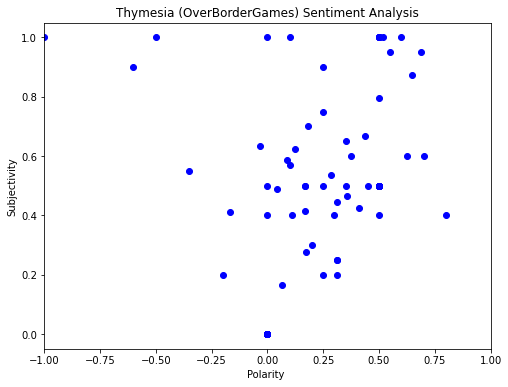

In [888]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Thymesia (OverBorderGames) Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity ')
plt.ylabel('Subjectivity')
plt.show()

# Only 3 neutral it is showing because it is overlapping

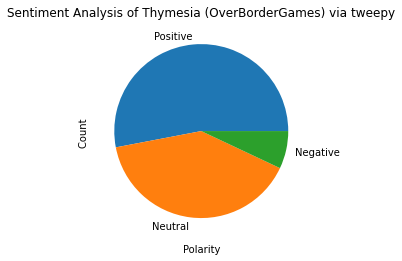

In [890]:
df['Analysis'].value_counts().plot(kind='pie')
plt.title("Sentiment Analysis of Thymesia (OverBorderGames) via tweepy")
plt.xlabel('Polarity')
plt.ylabel('Count ')
plt.show()

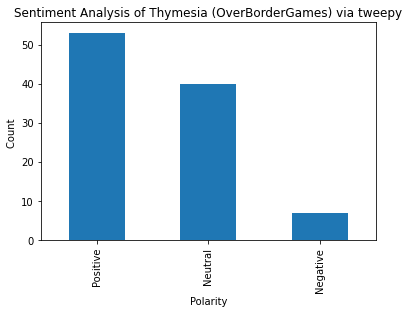

In [891]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis of Thymesia (OverBorderGames) via tweepy")
plt.xlabel('Polarity')
plt.ylabel('Count ')
plt.show()

In [870]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Positive'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) :  _Games  We absolutely loved exploring your demo and hope we can continue the story of clàr in the future!

2) Was great to have 3BIT cover our _Games stand in the RezzedZone of  this past weekend! Thank you for playing Harp Song 😁☘️

indiedev gamedev gaming indiegamedev videogames pcgaming madewithunity EGX2021 

3) We want to say a massive thank you to everyone for a successful !! We had an absolute blast meeting you all &amp; can’t wait to see what the future holds with our game ☘️🥰

EGX egx2021 indiegame IndieGameDev indiedev 

4) _Games: Last day to check out our excellent games. Come along to EGX2021 
 
 
 
…

5)    Thank youuu, so appreciated 🙌🏻🙏🏻

6) Thankful for our amazing players at  every day 🥰🥰 

7) For the many who’ve been curious, we are still giving out authentic Irish peat incense at our stand! Take home a piece of ancient Ireland from the game… it smells heavenly!! ☘️🌀

…and no, they’re not brownies 😂🤭

EGX2021 indiegames 

8) The gates are now OPEN for Day 3 of 

In [871]:
# Lets get negative tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Negative'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1) : Some screenshots from  the grad project i've been working on for the past 8 months for my Masters at the …

2)  We’ve spent the whoooole day getting ready for our first play at … lots of sticker-cutting, bag-stuffing, &amp; sneezing from dusty straw 😂😂 



3)  _rev We’ve spent the whoooole day getting ready for our first play at … lots of sticker-cutting, bag-stuffing, &amp; sneezing from dusty straw 😂😂 

4) : Holy shit well done guys

5) Catch our developers  &amp; _Glenister in issue 33 of ! 🙌🏻🥳

Learn a bit more about their process for developing the storyline, code, &amp; art behind our game! 😁😁

Full issue: 

indiedev gamedev indiegamedev pcgaming madewithunity  

6) : It's just a week until _Games 2nd year students showcase the games they have been developing for the past 9 months at…

7)  Thanks for the support! We’re a game mixing Irish mythology with indiedev on PC… check us out! 



8) : don't you wish you could grow hair back this fast after a bad haircut?



9)  _rev T

In [872]:
# Lets get neutral tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Neutral'):
        print(str(i)+ ') ' + sortedDF['Tweets'][j])
        print()
        i=i+1

1)   👏🏻👏🏻👏🏻👏🏻

2) : Thank you to everyone who helped make  a reality and thank you _lynch_  for making our booth at EGX2021 a…

3) :   
rezzedzone 
IndieGameDev 

4) Catch a glimpse of our BOPPIN’ stand 24 seconds in!! So thankful for all our indiegames players (and  of course!) ☘️💙 

5) : A reminder to check out  in the RezzedZone at  this weekend if you want to hear my voice acting debut as…

6) _lynch_: Ayyyyyyyy check those hoodies baby 

EGX2021 indiegames

7) _Games: This week we're coming to  with our   student games! Please do come by our stand and try them all:
…

8) : Hey thats me

9) Officially 1 week out to the start of !! 🎉🥳 Have a cinematic teaser to celebrate… 😁

Don’t forget to stop by the RezzedZone &amp; check out your fellow indies!! We’ll be there all weekend 😊

indiedev gamedev gaming indiegamedev videogames pcgaming madewithunity 

10)  Hehe join the club 😂 Thank you!!

11)  Thank you thank you thank you!! 😊😊 We’re mixing Irish mythology with indie gaming, let us 